In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
file = pd.read_csv('Reviews_dataset.csv',index_col= 0 )
file.reviews = file.reviews.str.split('|',expand=True)[1]

In [26]:
def clean_data(data):
    data = data.lower()
    return re.sub(r'[^a-zA-Z]+', ' ', data)

file['clean_data'] = file['reviews'].apply(clean_data)

## Tokenize

In [27]:
from nltk.tokenize import sent_tokenize
def token(data):
    return sent_tokenize(data)
file['token'] = file['clean_data'].apply(token)
def listostr(data):
    return "".join(data)
file['str'] = file['token'].apply(listostr)

## Stemming

In [28]:
from nltk.stem import PorterStemmer
nltk.download("punkt")
# Initialize Python porter stemmer
ps = PorterStemmer()
def stemmer(data):
    return ps.stem(data)
file['stemmer'] = file['str'].apply(stemmer)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Lemmatization

In [29]:
#lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()
def lemme(data):
    return wnl.lemmatize(data)
file['lemme'] = file['stemmer'].apply(lemme)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Stopwords

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
new_stopwords = ["ba","british","airways",'flight','lhr','name','airline']
stpword = nltk.corpus.stopwords.words('english')
stpword.extend(new_stopwords)
file['review'] = file['lemme'].apply(lambda x: ' '.join(word for word in x.split() if word not in (stpword)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Sentiment Analysis by Vader Sentiment

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def score(data):
    return analyzer.polarity_scores(data)['compound']

file['score'] =file['review'].apply(score)
def analysis(data):
    if data >= 0.5:
        return 'positive'
    elif data < 0:
        return 'negative'
    else:
        return 'neutral'

file['analysis'] = file['score'].apply(analysis)

## Final file

In [32]:
file.drop(columns = ['clean_data','stemmer','reviews','token','str','lemme'], inplace=True)
file

,review,score,analysis
0,never travel spent business class seat attend ...,-0.9670,negative
1,already portugal contacted today cancelled ret...,-0.3612,negative
2,terrible avoid becoming regular practice cance...,-0.8519,negative
3,despite gold member staff heathrow literally c...,0.7650,positive
4,regarding aircraft seat business class seats p...,0.8939,positive
...,...,...,...
995,four flights total first dublin london th june...,-0.8568,negative
996,johannesburg heathrow us proud recently flew b...,0.1796,neutral
997,queue bag drop massive move good mins senior p...,0.2263,neutral
998,changed plane consequently seating separating ...,-0.8750,negative


## Plotting Histogram, Pie-Chart and Wordcloud

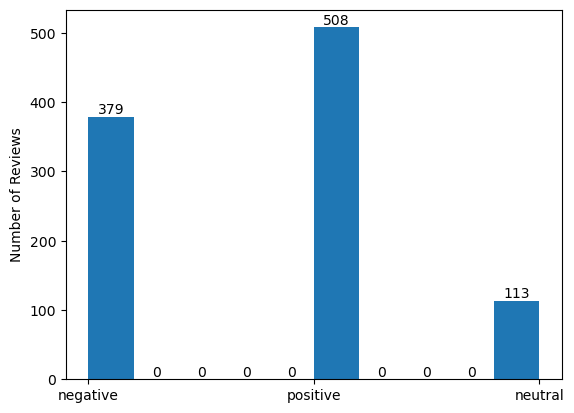

In [33]:
import matplotlib.pyplot as plt

plt.ylabel('Number of Reviews')

counts, bins, bars = plt.hist(file['analysis'])

plt.bar_label(bars)  

plt.savefig('Review_analysis_histogram.png')

plt.show()

In [34]:
from collections import Counter
count = Counter(file['analysis'])
count

Counter({'positive': 508, 'negative': 379, 'neutral': 113})

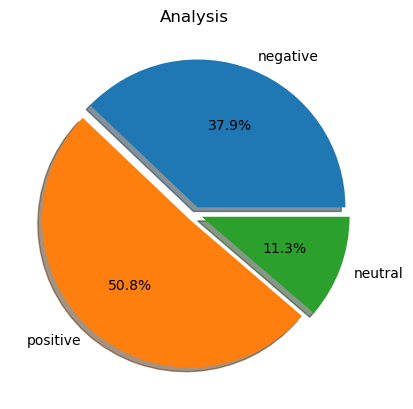

In [35]:
plt.title("Analysis")
plt.pie(count.values(), labels = count.keys(),autopct='%1.1f%%', shadow = True, explode = (0.05,0.05,0.05) )
plt.savefig('analysis_pie.png')

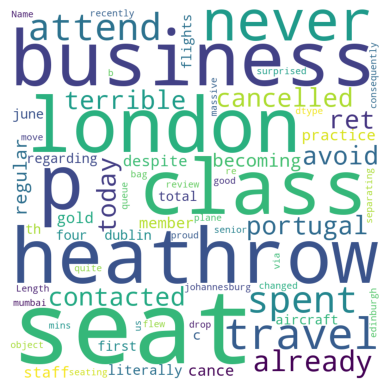

In [36]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(file['review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')